## Introduction

Data is ubiquitous, and leveraging historical data for forecasting remains valuable as history often repeats itself. Knowing the title of a book is beneficial, but reading it is far more useful; similarly, data is essential in our analyses.

In this project, I have utilized well-known US stock tickers, including Apple **(AAPL)**, Adobe **(ADBE)**, Amazon **(AMZN)**, Tesla **(TSLA)**, Nvidia **(NVDA)**, and Microsoft **(MSFT)**. The data was sourced from yFinance library in pyhton, a public and easily accessible platform that hosts realistic datasets. And the Financial Statments From Stock Analysis.

This project is structured around five key questions, each addressed in dedicated sections, and The Questions are
:

1.) What was the change in price and volume of each stock over time and their correlation over 2.51 years?

2.) What was the moving averages of the various stocks and the correlation between RSI and the Close Price over 2.51 years?

3.) What is the financial health of each company, and what is the primary metric to focus on?

4.) How can we predict future stock behavior for each Stock using Time Series Anaylsis?

5.) How accurate are our results by utilizing statistical measures?


**The structure of the report is as follows:**

Pre_Section: Loading the Data

Section 1: Q1 Answer

Section 2: Q2 Answer 

Section 3: Q3 Answer 

Section 4: Q4 Answer

Section 5: Q5 Answer 

Conclusion

## Pre_Section: Loading the Tickers

In [3]:
# Imports

import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke

# Load the data from the Excel file
AAPL = pd.read_csv("D:/P2_Stocks/AAPL/AAPL.csv")
# Display the data
AAPL.head()


date  close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  23.91                     26.08                          25.58   
1  1/5/2016  23.32                     26.03                          25.49   
2  1/6/2016  22.86                     25.95                          25.39   
3  1/7/2016  21.89                     25.86                          25.25   
4  1/8/2016  22.01                     25.79                          25.12   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      25.72                           25.99   
1                      25.69                           25.94   
2                      25.66                           25.88   
3                      25.62                           25.80   
4                      25.58                           25.72   

   Relative Strength Index 14  Daily_Return     volume  \
0                       30.42         0.001  270597600   
1                       29.37        -0.025  223164000   
2                       23.43        -0.020  273829600   
3                       21.41        -0.042  324377600   
4                       26.71         0.005  283192000   

   Moving Average Convergence Divergence  
0                                  -0.67  
1                                  -0.72  
2                                  -0.80  
3                                  -0.94  
4                                  -1.02

In [4]:
ADBE = pd.read_csv("D:/P2_Stocks/ADBE/ADBE.csv")
# Display the data
ADBE.head()

Date  Adj Close  Simple Moving Average_50  \
0  1/4/2016      91.97                     91.36   
1  1/5/2016      92.34                     91.44   
2  1/6/2016      91.02                     91.51   
3  1/7/2016      89.11                     91.51   
4  1/8/2016      87.85                     91.51   

   Exponential Moving Average_50  Simple Moving Average_100  \
0                          90.97                      86.67   
1                          91.02                      86.76   
2                          91.02                      86.82   
3                          90.95                      86.85   
4                          90.83                      86.87   

   Exponential Moving Average_100  Relative Strength Index 14  Daily_Return  \
0                           87.95                       45.68        -0.021   
1                           88.04                       44.22         0.004   
2                           88.10                       34.15        -0.014   
3                           88.12                       32.89        -0.021   
4                           88.11                       36.93        -0.014   

    Volume  
0  2993800  
1  1821300  
2  1674000  
3  2717800  
4  2263400

In [5]:
TSLA = pd.read_csv("D:/P2_Stocks/TSLA/TSLA.csv")
# Display the data
TSLA.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  14.89                     14.91                          15.25   
1  1/5/2016  14.90                     14.93                          15.24   
2  1/6/2016  14.60                     14.94                          15.21   
3  1/7/2016  14.38                     14.94                          15.18   
4  1/8/2016  14.07                     14.94                          15.13   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      15.51                           15.44   
1                      15.50                           15.43   
2                      15.49                           15.42   
3                      15.47                           15.40   
4                      15.44                           15.37   

   Relative Strength Index 14  Daily_Return     Volume  
0                       54.38        -0.069  102406500  
1                       52.22         0.000   47802000  
2                       32.25        -0.020   56686500  
3                       30.65        -0.015   53314500  
4                       29.54        -0.022   54421500

In [6]:
AMZN = pd.read_csv("D:/P2_Stocks/AMZN/AMZN.csv")
# Display the data
AMZN.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  31.85                     32.77                          32.23   
1  1/5/2016  31.69                     32.84                          32.21   
2  1/6/2016  31.63                     32.87                          32.18   
3  1/7/2016  30.40                     32.87                          32.11   
4  1/8/2016  30.35                     32.87                          32.05   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                      29.55                            0.93   
1                      29.61                            0.91   
2                      29.66                            0.92   
3                      29.70                            0.96   
4                      29.73                            0.95   

   Relative Strength Index 14  Daily_Return     Volume  
0                       41.34        -0.058  186290000  
1                       39.92        -0.005  116452000  
2                       29.91        -0.002  106584000  
3                       25.29        -0.039  141498000  
4                       26.47        -0.001  110258000

In [7]:
MSFT = pd.read_csv("D:/P2_Stocks/MSFT/MSFT.csv", low_memory=False)
# Display the data
MSFT.head()

Date  Adj Close  Simple Moving Average_50  \
0  1/4/2016      48.52                     48.05   
1  1/5/2016      48.74                     48.18   
2  1/6/2016      47.86                     48.21   
3  1/7/2016      46.19                     48.18   
4  1/8/2016      46.33                     48.16   

   Exponential Moving Average_50  Simple Moving Average_100  \
0                          47.40                      43.75   
1                          47.45                      43.83   
2                          47.47                      43.90   
3                          47.42                      43.95   
4                          47.38                      44.00   

   Exponential Moving Average_100  Relative Strength Index 14  Daily Returns  \
0                           45.16                       47.72         -0.012   
1                           45.23                       49.02          0.005   
2                           45.29                       36.53         -0.018   
3                           45.30                       30.75         -0.035   
4                           45.32                       38.40          0.003   

     Volume  
0  53778000  
1  34079700  
2  39518900  
3  56564900  
4  48754000

In [8]:
NVDA = pd.read_csv("D:/P2_Stocks/NVDA/NVDA.csv")
# Display the data
NVDA.head()

Date  Close  Simple Moving Average_50  Exponential Moving Average_50  \
0  1/4/2016  0.809                      0.78                           0.78   
1  1/5/2016  0.822                      0.78                           0.78   
2  1/6/2016  0.788                      0.79                           0.78   
3  1/7/2016  0.757                      0.79                           0.78   
4  1/8/2016  0.741                      0.79                           0.78   

   Simple Moving Average_100  Exponential Moving Average_100  \
0                       0.69                            0.71   
1                       0.69                            0.72   
2                       0.69                            0.72   
3                       0.70                            0.72   
4                       0.70                            0.72   

   Relative Strength Index 14  Daily_Return     Volume  
0                       47.80        -0.018  358076000  
1                       49.14         0.016  490272000  
2                       35.91        -0.041  449344000  
3                       31.81        -0.040  645304000  
4                       31.24        -0.021  398472000

## Section 1: Q1 Answer

### 1.) What was the change in price and volume of each stock over time and their correlation over 2.51 years?

##### **VI. Definitions:**

##### Close Price:
*Definition*: The close price is the final price at which a security is traded on a given trading day.

*Usage*: It represents the **last transaction** price before the market closes.

*Significance*: Investors and analysts use the close price to **assess the daily performance** of a security and make trading decisions.


##### Adjusted Close Price:

Definition: The adjusted close price is the close price adjusted for any corporate actions that occurred before the next trading day.

Adjustments Include:

*Dividends*: Cash dividends paid out to shareholders are accounted for. The stock price typically drops by the dividend amount on the ex-dividend date.

*Stock Splits*: If a company splits its stock, increasing the number of shares while reducing the price per share proportionally, the adjusted close price reflects this change.

Other Corporate Actions: Such as *spin-offs*.

##### Trading volume:
it refers to the total number of shares or contracts traded for a specific security during a given period. This metric can be measured for different time frames, such as a single trading day, a week, a month, or any other period. Trading volume is a crucial indicator in financial markets because it provides insight into the activity and liquidity of a security.


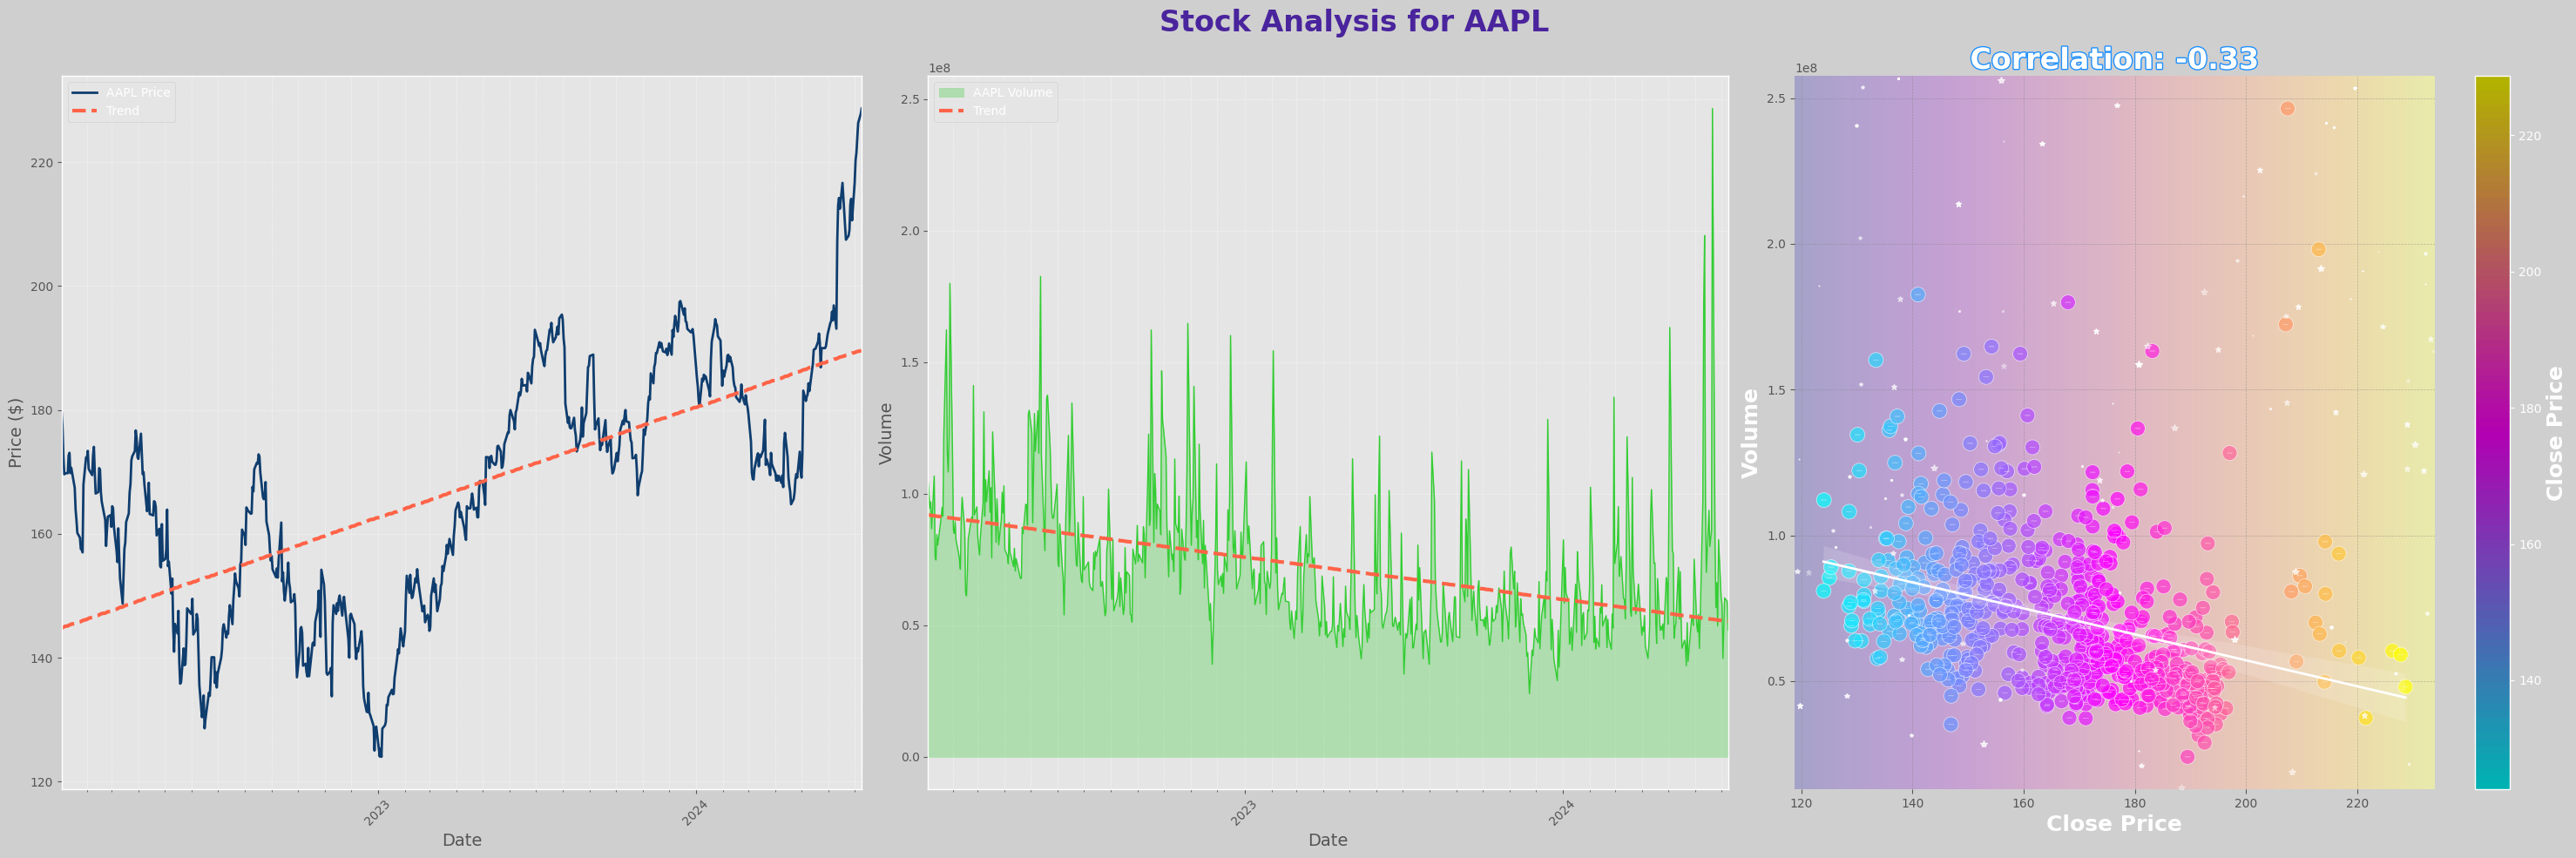

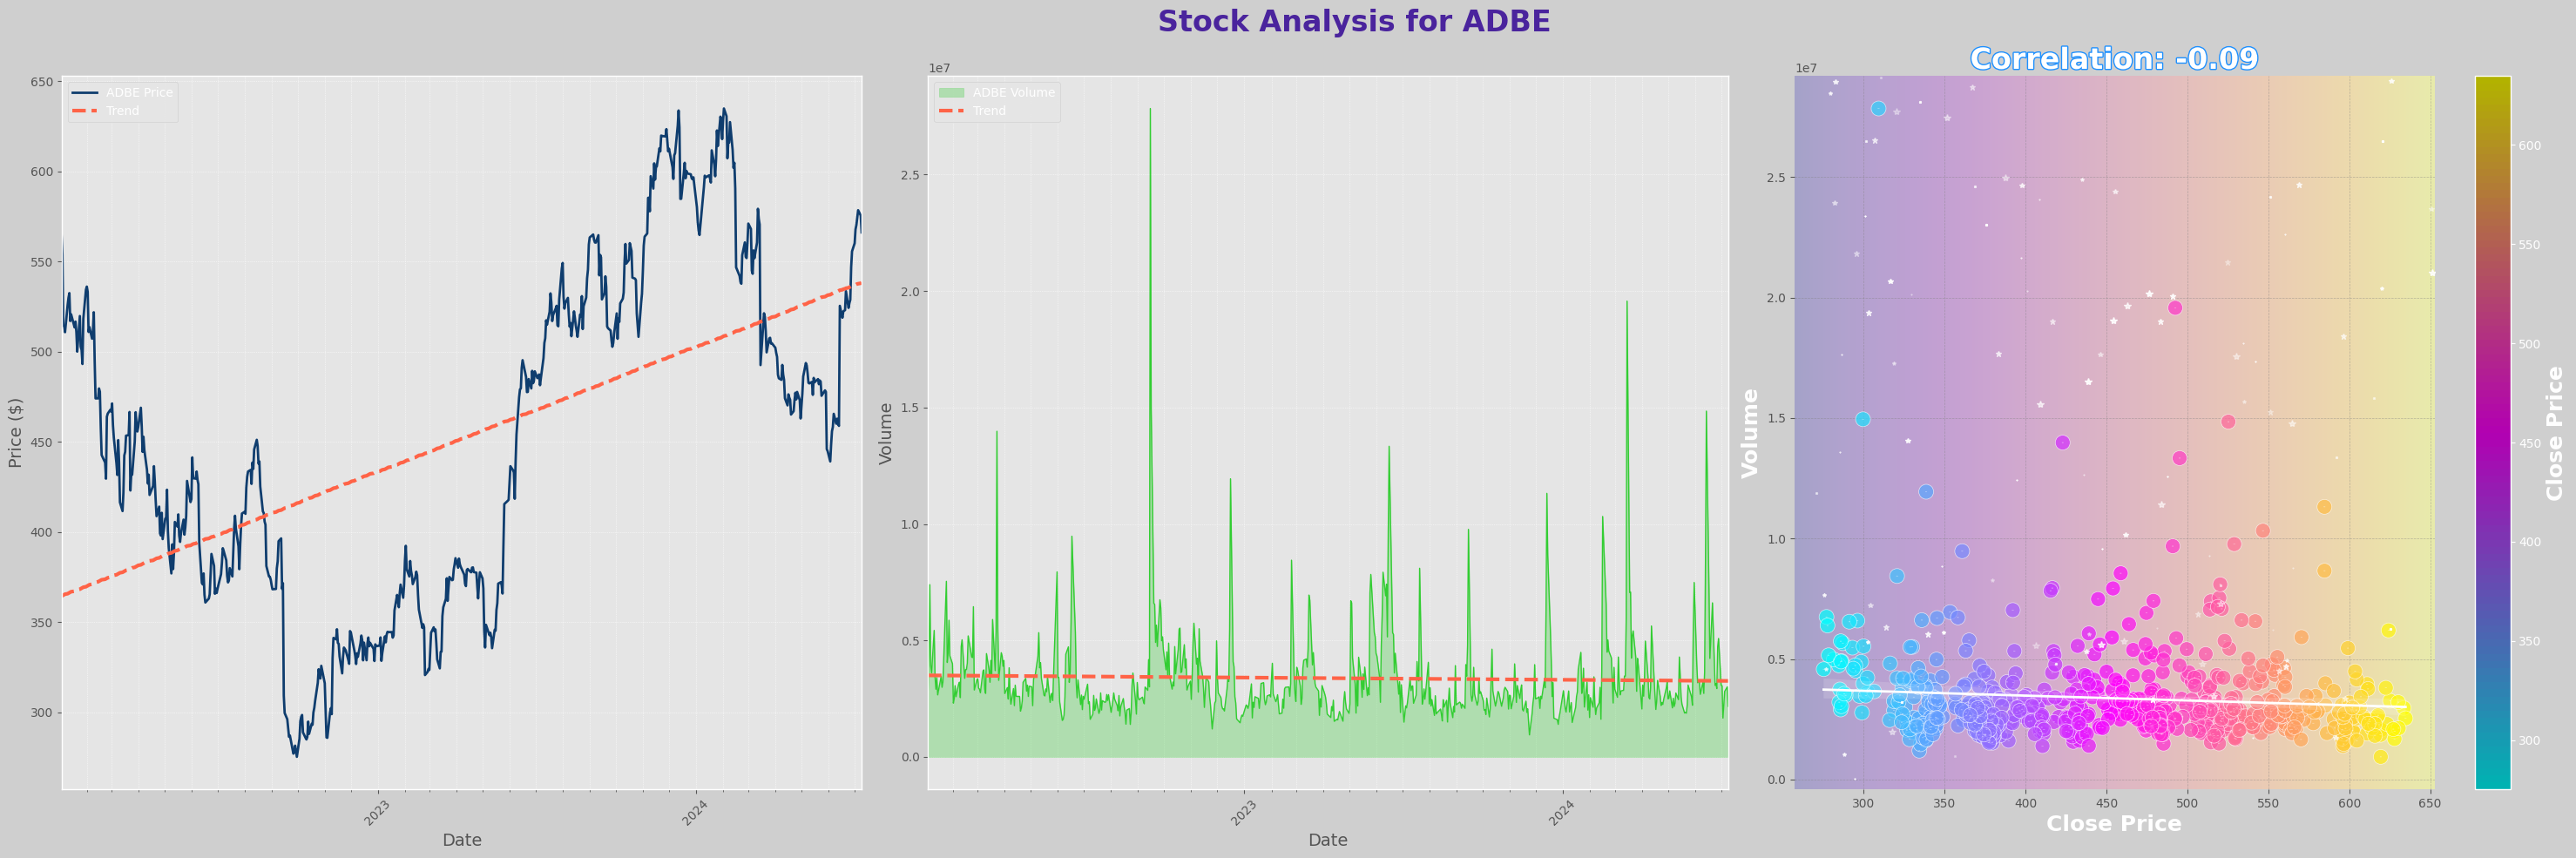

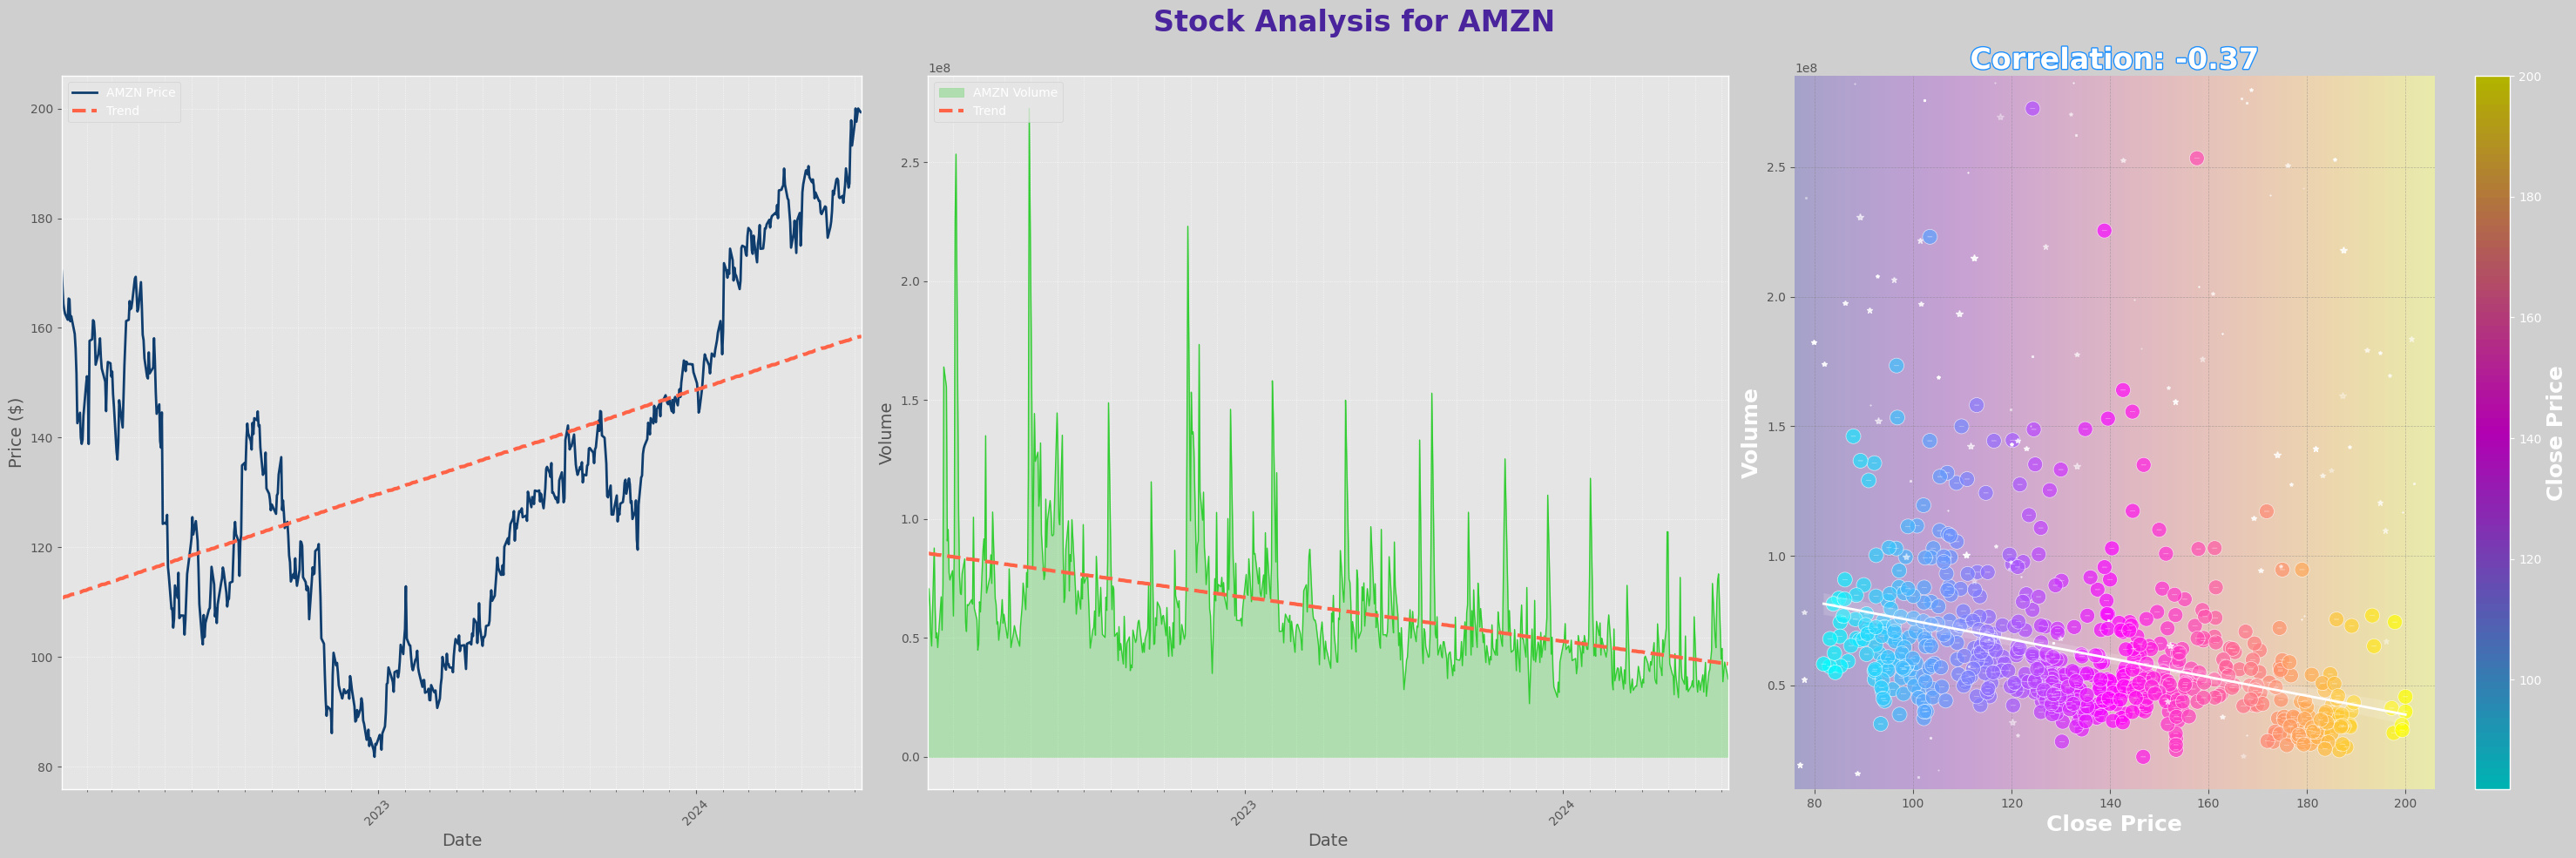

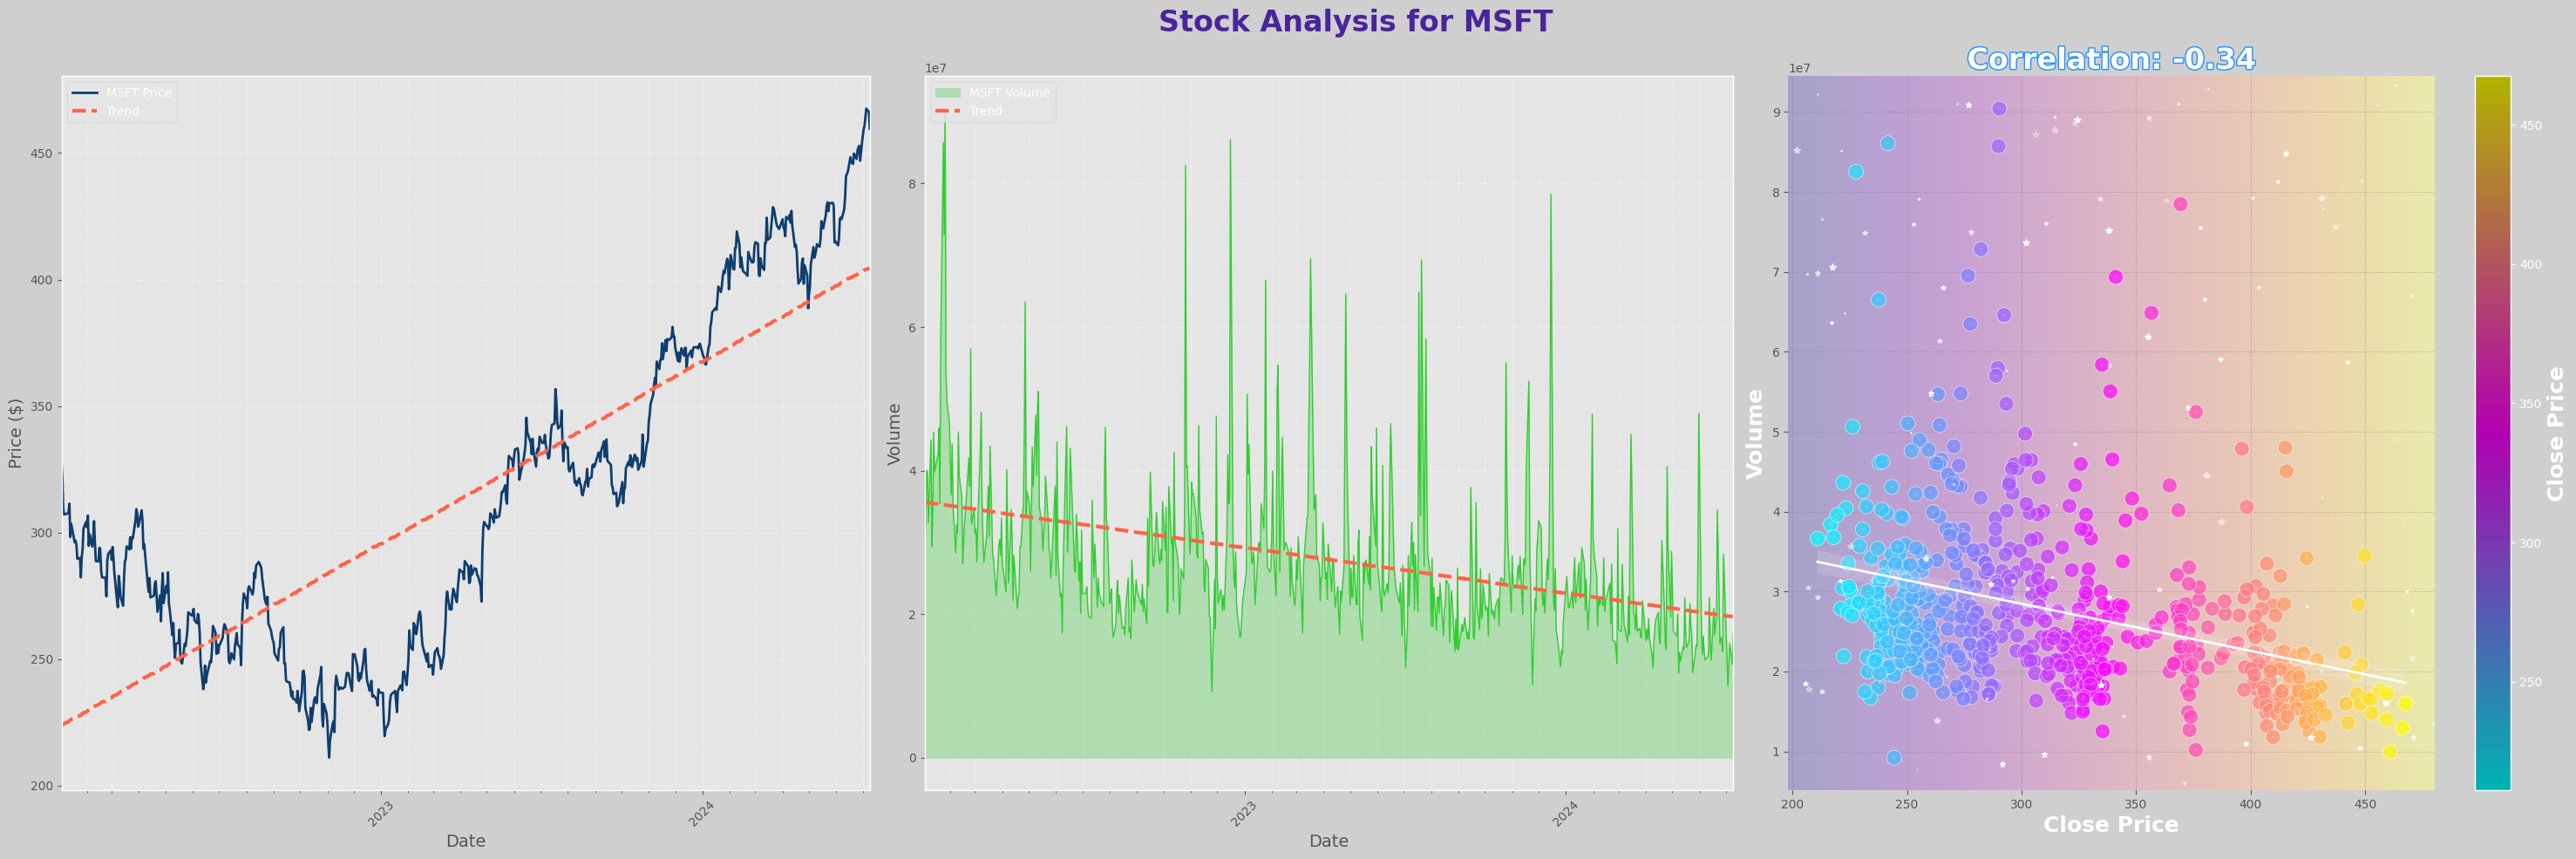

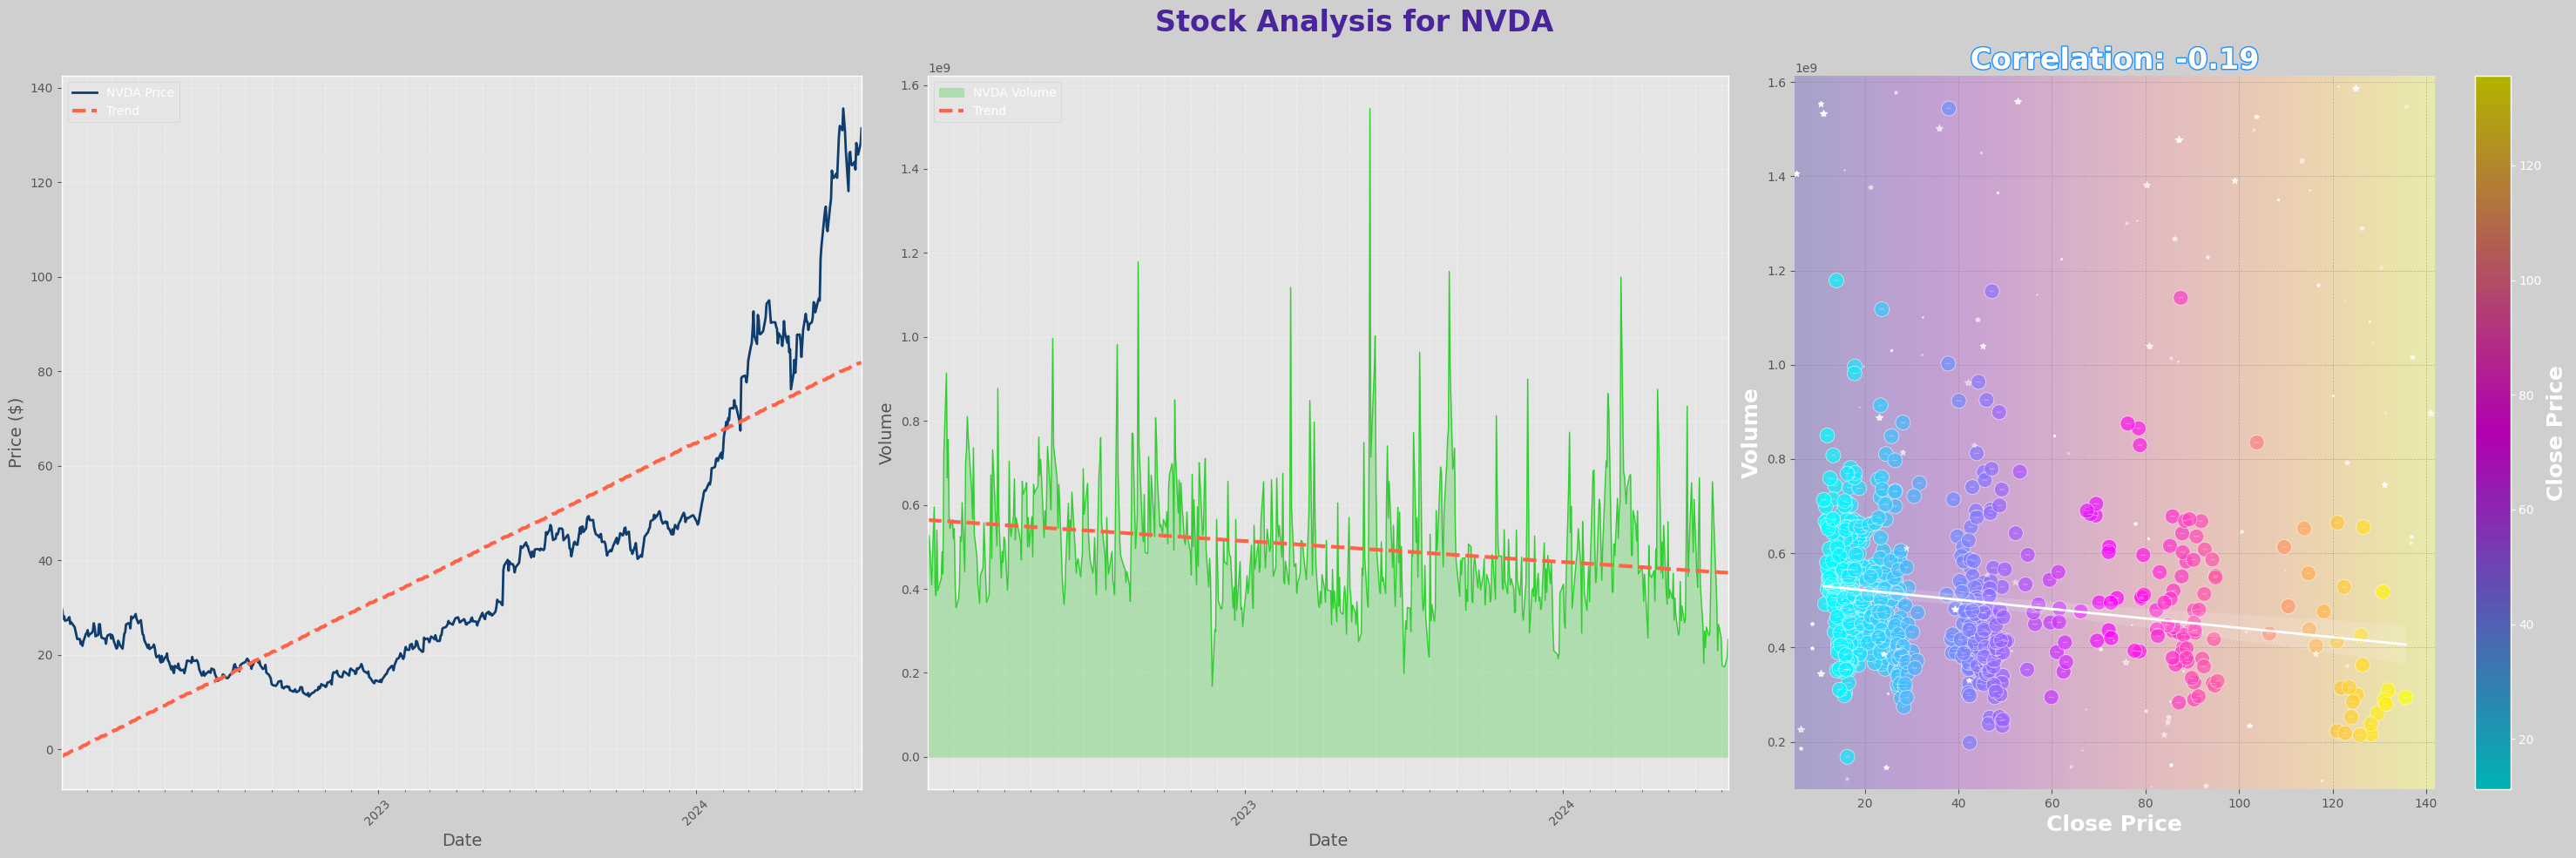

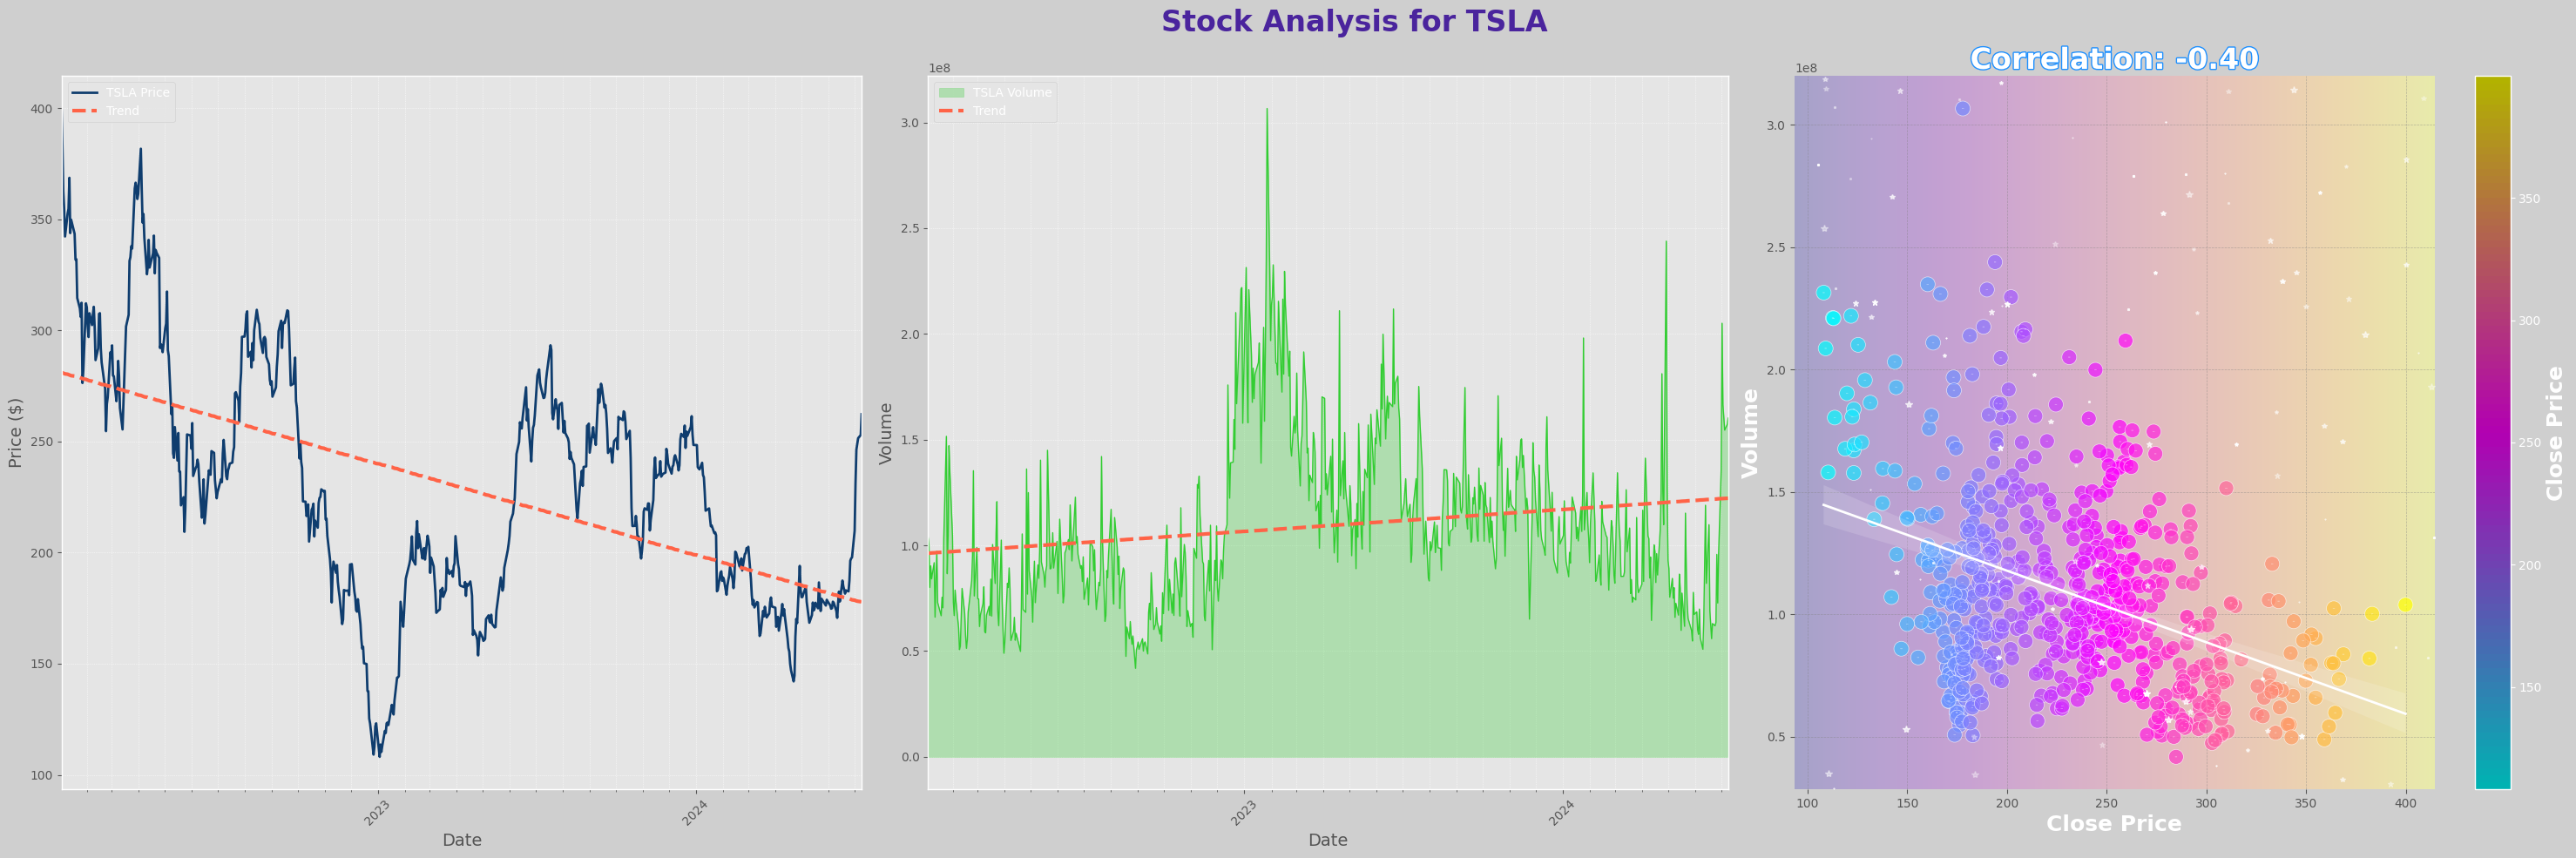

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from scipy import stats
import matplotlib.dates as mdates

def get_column_names(file_path):
    df = pd.read_csv(file_path, nrows=5)
    date_col = next((col for col in df.columns if 'date' in col.lower()), None)
    price_col = next((col for col in df.columns if 'close' in col.lower() or 'price' in col.lower()), None)
    volume_col = next((col for col in df.columns if 'volume' in col.lower()), None)
    if not all([date_col, price_col, volume_col]):
        print(f"Warning: Could not identify all required columns in {file_path}")
        print(f"Available columns: {df.columns.tolist()}")
    return date_col, price_col, volume_col

def plot_individual_trend_and_volume_graphs(file_paths, tickers):
    for ticker, file_path in zip(tickers, file_paths):
        date_column, price_column, volume_column = get_column_names(file_path)
        
        if not all([date_column, price_column, volume_column]):
            print(f"Skipping {ticker} due to missing column information")
            continue
        
        df = pd.read_csv(file_path, parse_dates=[date_column], low_memory=False)
        df = df.dropna(subset=[date_column, price_column, volume_column])
        df = df.sort_values(by=date_column)
        
        # Plot stock price, volume, and correlation
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(30, 10))
        gs = fig.add_gridspec(1, 3)
        
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[0, 2])
        
        # Plot stock price
        ax1.plot(df[date_column], df[price_column], label=f'{ticker} Price', color='#0F3D6E', linewidth=2)
        x = np.arange(len(df))
        y = df[price_column]
        slope, intercept, _, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax1.plot(df[date_column], line, color='#ff6347', linestyle='--', linewidth=3, label='Trend')
        
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_minor_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax1.tick_params(axis='x', rotation=45, which='major')
        ax1.set_xlim(left=df[date_column].min(), right=df[date_column].max())
        ax1.grid(True, which='both', linestyle=':', linewidth=0.5)
        ax1.legend(fontsize=10, loc='upper left')
        
        ax1.set_xlabel('Date', fontsize=14)
        ax1.set_ylabel('Price ($)', fontsize=14)
        
        fig.suptitle(f'Stock Analysis for {ticker}', fontsize=24, fontweight='bold', color='#4A249D', x=0.52)
        
        # Plot trading volume
        ax2.fill_between(df[date_column], df[volume_column], color='#32cd32', alpha=0.3, label=f'{ticker} Volume')
        ax2.plot(df[date_column], df[volume_column], color='#32cd32', linewidth=1)
        y = df[volume_column]
        slope, intercept, _, _, _ = stats.linregress(x, y)
        line = slope * x + intercept
        ax2.plot(df[date_column], line, color='#ff6347', linestyle='--', linewidth=3, label='Trend')
        
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_minor_locator(mdates.MonthLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax2.tick_params(axis='x', rotation=45, which='major')
        ax2.set_xlim(left=df[date_column].min(), right=df[date_column].max())
        ax2.grid(True, which='both', linestyle=':', linewidth=0.5)
        ax2.legend(fontsize=10, loc='upper left')
        
        ax2.set_xlabel('Date', fontsize=14)
        ax2.set_ylabel('Volume', fontsize=14)
        
        # Calculate correlation
        correlation, p_value = stats.pearsonr(df[price_column], df[volume_column])
        
        # Plot correlation
        plt.style.use('dark_background')

        # Create a custom colormap
        colors = ["#00FFFF", "#FF00FF", "#FFFF00"]
        n_bins = 100
        cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

        # Create the scatter plot
        scatter = ax3.scatter(df[price_column], df[volume_column], s=150, c=df[price_column], cmap=cmap, alpha=0.7, edgecolors='white')

        # Add a trend line
        sns.regplot(data=df, x=price_column, y=volume_column, ax=ax3, scatter=False, color='white', line_kws={'linewidth': 2})

        # Customize the plot
        title = ax3.set_title(f'Correlation: {correlation:.2f}', fontsize=24, color='white', fontweight='bold')
        title.set_path_effects([withStroke(linewidth=2, foreground='#1e90ff')])
        ax3.set_xlabel('Close Price', fontsize=18, color='white', fontweight='bold')
        ax3.set_ylabel('Volume', fontsize=18, color='white', fontweight='bold')

        # Add a colorful background gradient
        gradient = np.linspace(0, 1, 256).reshape(1, -1)
        ax3.imshow(gradient, extent=[ax3.get_xlim()[0], ax3.get_xlim()[1], ax3.get_ylim()[0], ax3.get_ylim()[1]], 
                   aspect='auto', alpha=0.3, cmap='plasma')

        # Add grid lines
        ax3.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

        # Add a shiny effect
        for spine in ax3.spines.values():
            spine.set_visible(False)

        # Add glowing effect to data points
        for i in range(len(df)):
            ax3.add_artist(plt.Circle((df[price_column][i], df[volume_column][i]), 0.5, color='white', alpha=0.3))

        # Add some sparkles
        for _ in range(100):
            x = np.random.uniform(ax3.get_xlim()[0], ax3.get_xlim()[1])
            y = np.random.uniform(ax3.get_ylim()[0], ax3.get_ylim()[1])
            ax3.plot(x, y, 'w*', markersize=np.random.randint(1, 7), alpha=np.random.uniform(0.3, 1))

        # Add a colorbar
        cbar = plt.colorbar(scatter, ax=ax3)
        cbar.set_label('Close Price', fontsize=18, color='white', fontweight='bold')

        # Add a subtle outer glow to the entire figure
        fig.patch.set_facecolor('#121212')
        plt.tight_layout()
        fig.patch.set_alpha(0.2)

        # Save figures
        plt.savefig(f'{ticker}_price_volume_correlation_analysis.svg', format='JPG', dpi=300, bbox_inches='tight')
        plt.show()

# Our stock data
stocks = {
    "AAPL": "D:/P2_Stocks/AAPL/AAPL_2.csv",
    "ADBE": "D:/P2_Stocks/ADBE/ADBE_2.csv",
    "AMZN": "D:/P2_Stocks/AMZN/AMZN_2.csv",
    "MSFT": "D:/P2_Stocks/MSFT/MSFT_2.csv",
    "NVDA": "D:/P2_Stocks/NVDA/NVDA_2.csv",
    "TSLA": "D:/P2_Stocks/TSLA/TSLA_2.csv"
}

plot_individual_trend_and_volume_graphs(
    file_paths=list(stocks.values()),
    tickers=list(stocks.keys())
)

To assess market and stock liquidity effectively and ensure our caluculations and results are upon accurate analysis, it is crucial to consider the correlation between price and volume. A high correlation between these factors can provide valuable insights into market sentiment and liquidity. Volume serves as a strong indicator of the strength behind price movements.

#### **Conclusion** 

You may have wondered about the benefits of visualizing trading volume and how it connects with the closing price. Let's discuss some insights, which, while not universally true, are often observed.

We have ***four scenarios***:

##### **1.) Price Increase with Increasing Volume (+ne Correlation)**:

This indicates **strong buying interest** and can confirm an uptrend. High volume on price increases suggests that the price movement is supported by strong market participation.

***No one under this scenario***

_________________________
##### **2.)Price Increase with Decreasing Volume (-ne Correlation)**:

This might be a **warning sign** of a potential reversal. If the price is rising but the volume is decreasing, it suggests that **fewer investors are supporting the price increase**, indicating potential weakness.

**ADBE=>** -0.09: Least negative, indicating a very weak negative relationship.

**NVDA=>** -0.19: Weak negative relationship.

**AAPL=>** -0.33: Weak to moderate negative relationship.

**MSFT=>** -0.34: Moderate negative relationship.

**AMZN=>** -0.37: Moderate negative relationship.

_______________________
##### **3.)Price Decrease with Increasing Volume (-ne Correlation)**:

This indicates **strong selling interest** and can confirm a downtrend. High volume on price decreases suggests that the price movement is driven by significant selling pressure.

You may wonder why the price decreases in this scenario. It is due to the relationship between supply and demand. When investors have many shares they are willing to sell but there are not enough buyers, supply exceeds demand, leading to a decrease in price.

**TSLA=>** -0.40: Most negative, indicating a moderate negative relationship.

______________
##### **4.)Price Decrease with Decreasing Volume (+ne Correlation)**:

This can indicate a **lack of conviction** in the downtrend. If the price is falling but the volume is decreasing, it suggests that fewer investors are participating in the sell-off, indicating potential stabilization.

To clarify further: When a stock’s price is falling but the volume is also decreasing, it suggests that the intense selling pressure is diminishing. Fewer investors are participating in the sell-off, meaning that the downward movement is not strongly supported by a large number of sellers. As a result, the stock might be traded at a discount, and other investors may hold onto the stock in anticipation of a potential reversal or due to emotional biases.

***No one under this scenario***

## Section 2: Q2 Answer

### 2.) What was the moving averages of the various stocks and the correlation between RSI and the Close Price over 2.51 years?

After analzying and identifying the trends for the stock price and its volume for each Ticker.

Now we want to do the same but with SMA,EMA and RSI to see how the stock price average trend over the Stock's life.

#### ***What is the difference between SMA and EMA?***

**Simple Moving Average (SMA):**

Definition: SMA smooths out price data by creating an average price over a specific number of periods. It assigns equal weight to all the prices in the period.
Trend Indication: A rising SMA indicates an uptrend, while a falling SMA indicates a downtrend.
Lagging Indicator: Due to its equal weighting, SMA tends to lag more compared to EMA.

**Exponential Moving Average (EMA):**

Definition: EMA gives more weight to recent prices, making it more responsive to new information compared to the SMA.

Trend Indication: Similar to SMA, but it reacts more quickly to price changes due to its weighting formula.

Lagging Indicator: EMA lags less than SMA, making it more sensitive to recent price movements.

*Importance of Analyzing SMA and EMA* => By analyzing the movements of SMA and EMA, you can better understand the stock price trends over the stock's life. The SMA provides a smoother, long-term perspective, while the EMA offers a more immediate reaction to recent price changes, allowing for timely trading decisions.

**Relative Strength Index (RSI):**

RSI measures the speed and change of price movements, oscillating between 0 and 100:

Overbought Condition: An RSI above 70 typically indicates overbought conditions, suggesting a potential sell opportunity.

Oversold Condition: An RSI below 30 indicates oversold conditions, suggesting a potential buy opportunity.

Divergence: Look for divergences between the RSI and price to spot potential reversals.

**Comprehensive Analysis Approach**
Below we will an interactin of  SMA_50, EMA_50, and RSI_14 together from 2022 to 2024, you can get a comprehensive view of the stock's trend, momentum, and potential reversal points. This multi-faceted approach enhances the reliability of trading signals and helps make more informed investment decisions.

So let's begin:

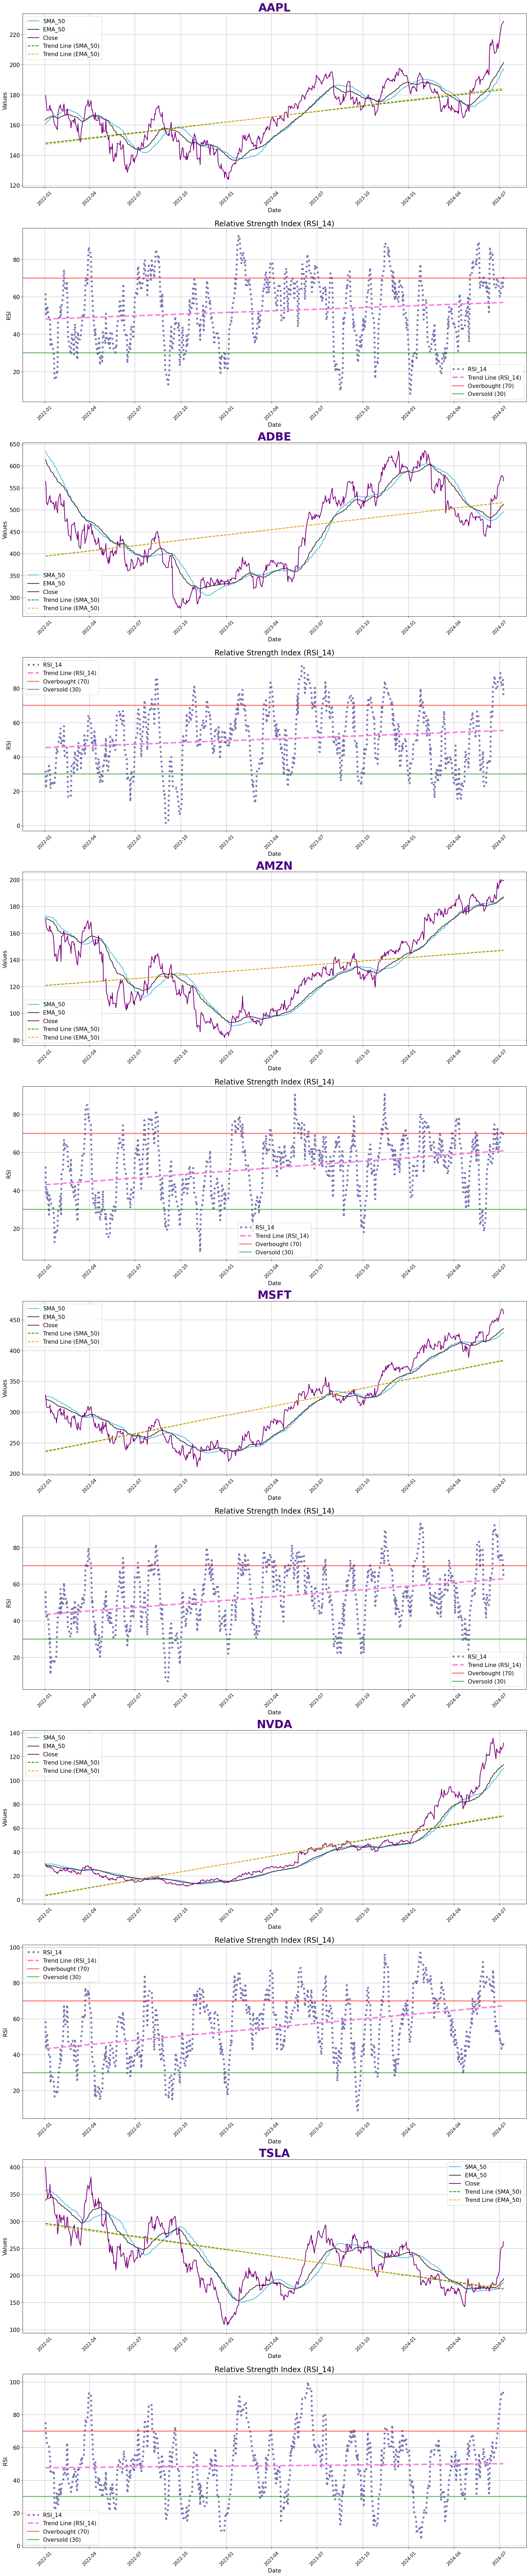

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a function to create subplots for each stock
def create_subplot(data_path, stock_name, ax):
    # Load the CSV data
    data = pd.read_csv(data_path)

    # Convert the 'date' column to datetime format
    date_column = 'date' if 'date' in data.columns else 'Date'
    data[date_column] = pd.to_datetime(data[date_column], format='%m/%d/%Y')

    # Sort data by date
    data = data.sort_values(date_column)

    # Define close column based on provided datasets
    close_column = 'close' if 'close' in data.columns else 'Adj Close' if 'Adj Close' in data.columns else 'Close'

    # Calculate polynomial fit for SMA_50 to add a trend line
    z_sma = np.polyfit(data.index, data['Simple Moving Average_50'], 1)
    p_sma = np.poly1d(z_sma)

    # Calculate polynomial fit for EMA_50 to add a trend line
    z_ema = np.polyfit(data.index, data['Exponential Moving Average_50'], 1)
    p_ema = np.poly1d(z_ema)

    # First subplot: SMA_50, EMA_50, and close with trend lines
    ax[0].plot(data[date_column], data['Simple Moving Average_50'], label='SMA_50', color='#4CB9E7', linewidth=2)
    ax[0].plot(data[date_column], data['Exponential Moving Average_50'], label='EMA_50', color='#3E3232', linewidth=2)
    ax[0].plot(data[date_column], data[close_column], label='Close', color='purple', linewidth=2)
    ax[0].plot(data[date_column], p_sma(data.index), label='Trend Line (SMA_50)', color='green', linestyle='--', linewidth=2)
    ax[0].plot(data[date_column], p_ema(data.index), label='Trend Line (EMA_50)', color='orange', linestyle='--', linewidth=2)
    ax[0].set_title(f'{stock_name}', fontsize=30, fontweight='bold', color='#4B0082')
    ax[0].set_xlabel('Date', fontsize=15)
    ax[0].set_ylabel('Values', fontsize=15)
    ax[0].legend(fontsize=15)
    ax[0].grid(True)
    ax[0].tick_params(axis='x', rotation=45, labelsize=12)
    ax[0].tick_params(axis='y', labelsize=15)

    # Second subplot: RSI
    z_rsi = np.polyfit(data.index, data['Relative Strength Index 14'], 1)
    p_rsi = np.poly1d(z_rsi)
    ax[1].plot(data[date_column], data['Relative Strength Index 14'], label='RSI_14', linestyle=':', linewidth=5, color='#7776B3')
    ax[1].plot(data[date_column], p_rsi(data.index), label='Trend Line (RSI_14)', color='#FF7EE2', linestyle='--', linewidth=4)
    ax[1].axhline(70, linestyle='-', alpha=0.5, color='red', label='Overbought (70)', linewidth=3)
    ax[1].axhline(30, linestyle='-', alpha=0.5, color='green', label='Oversold (30)', linewidth=3)
    ax[1].set_title('Relative Strength Index (RSI_14)', fontsize=20)
    ax[1].set_xlabel('Date', fontsize=15)
    ax[1].set_ylabel('RSI', fontsize=15)
    ax[1].legend(fontsize=15)
    ax[1].grid(True)
    ax[1].tick_params(axis='x', rotation=45, labelsize=12)
    ax[1].tick_params(axis='y', labelsize=15)

# Paths to CSV files for each stock
stock_paths = {
    "AAPL": "D:/P2_Stocks/AAPL/AAPL_2.csv",
    "ADBE": "D:/P2_Stocks/ADBE/ADBE_2.csv",
    "AMZN": "D:/P2_Stocks/AMZN/AMZN_2.csv",
    "MSFT": "D:/P2_Stocks/MSFT/MSFT_2.csv",
    "NVDA": "D:/P2_Stocks/NVDA/NVDA_2.csv",
    "TSLA": "D:/P2_Stocks/TSLA/TSLA_2.csv"
}

# Create a figure with multiple subplots (2 rows per stock, 1 column)
fig, axs = plt.subplots(12, 1, figsize=(20, 100))  # Increase figure height

# Iterate over each stock and its respective subplot axes
for i, (stock, path) in enumerate(stock_paths.items()):
    create_subplot(path, stock, [axs[2*i], axs[2*i + 1]])

# Adjust layout to make space for the subtitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()

##### Conclusion

We have **Four Scenarios** then we will indicate the and catagorize each Ticker with its scenario:

*Scenario 1*: Both Price and RSI are Increasing
Indication:

Strong Bullish Trend: This indicates a sustained and strong uptrend with continuous buying pressure.
Momentum Confirmation: The rising RSI confirms the upward price momentum.
Actions:

Continue holding or buy more shares.
Monitor for bearish divergences.


_______________
*Scenario 2*: Both Price and RSI are Decreasing
Indication:

Strong Bearish Trend: This suggests a sustained downtrend with continuous selling pressure.
Momentum Confirmation: The declining RSI confirms the downward price momentum.
Actions:

Consider selling or avoiding buying.
Monitor for bullish divergences.


_______________________
*Scenario 3*: Price is Increasing, but RSI is Decreasing
Indication:

Bearish Divergence: This can indicate a potential weakening of the bullish trend.
Potential Reversal: The price may continue to rise, but the decreasing RSI suggests that the momentum behind the rise is weakening.
Actions:

Be cautious about new purchases.
Consider taking profits or tightening stop-loss orders.
Watch closely for reversal signals.


____________________________
*Scenario 4*: Price is Decreasing, but RSI is Increasing
Indication:

Bullish Divergence: This can indicate a potential weakening of the bearish trend.
Potential Reversal: The price may continue to fall, but the increasing RSI suggests that the momentum behind the decline is weakening.
Actions:

Consider potential buying opportunities.
Wait for confirmation of the trend reversal before making significant trades.
Monitor for additional bullish signals.

## Section 3: Q3 Answer


## Section 4: Q4 Answer 

## Section 5: Q5 Answer 

## Conclusion